In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load table and check missing value

In [2]:
xls = pd.ExcelFile('./data/varo/2019.xlsx')
account_table = pd.read_excel(xls, 'Account_Info', parse_dates =['App Install Date', 'Account Created Date'])
card_table = pd.read_excel(xls, 'Card_Detail', parse_dates = ['Card Activated Date'])
account_transactions_table = pd.read_excel(xls, 'Account_Transactions')

In [3]:
print(account_table.head())
print(account_table.info())
# each customer id has a install date but may not have an account created date, i.e.
# the data has null values only in the 'Account Created Date' column
print(account_table.isnull().sum())

   Customer ID Marketing Acquistion Channel App Install Date  \
0       100006                 Facebook Ads       2017-06-23   
1       100074               Google Adwords       2017-05-23   
2       100162                      Unknown       2017-05-04   
3       100245                 Facebook Ads       2017-05-21   
4       100248               Google Adwords       2017-05-16   

  Account Created Date  
0           2017-07-05  
1           2017-05-23  
2           2017-05-20  
3                  NaT  
4           2017-05-17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Customer ID                     10000 non-null int64
Marketing Acquistion Channel    10000 non-null object
App Install Date                10000 non-null datetime64[ns]
Account Created Date            8316 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 312.6+ KB
None
Customer ID                        0
Marketing Acqui

In [4]:
print(card_table.head())
print(card_table.info())
print(card_table.isnull().sum())

   Customer ID Card Activated Date
0       584099          2017-05-07
1       763204          2017-05-07
2       194023          2017-05-08
3       817189          2017-05-09
4       102606          2017-05-10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 2 columns):
Customer ID            3476 non-null int64
Card Activated Date    3476 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 54.4 KB
None
Customer ID            0
Card Activated Date    0
dtype: int64


In [5]:
print(account_transactions_table.head())
print(account_transactions_table.info())
print(account_transactions_table.isnull().sum())

   Customer ID  Amount Funded in First 7 Days
0       998222                           6669
1       998088                             40
2       997627                            191
3       997218                           2281
4       996213                             20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 2 columns):
Customer ID                      1061 non-null int64
Amount Funded in First 7 Days    1061 non-null int64
dtypes: int64(2)
memory usage: 16.7 KB
None
Customer ID                      0
Amount Funded in First 7 Days    0
dtype: int64


### Check duplicate information

In [6]:
# account table information
print('Account table:','\n', account_table['Customer ID'].value_counts().head())
# card table information
print('Card table:','\n', card_table['Customer ID'].value_counts().head())
# account transaction table information
print('Account transaction table:','\n', account_transactions_table['Customer ID'].value_counts().head())

Account table: 
 668098    2
143147    2
770122    2
676980    2
606573    2
Name: Customer ID, dtype: int64
Card table: 
 450877    2
847202    2
778007    2
436932    1
836293    1
Name: Customer ID, dtype: int64
Account transaction table: 
 105023    1
314029    1
881363    1
469713    1
218673    1
Name: Customer ID, dtype: int64


Here we find that there are duplicate items for a same customer ID in both the account table and the card table, but not in the account transaction table.
### Delete duplicate values in the account table

In [7]:
account_table.loc[account_table['Customer ID'] == 770122]

# Here we find that some customers installed the app, created account and then deleted the app only.

,Customer ID,Marketing Acquistion Channel,App Install Date,Account Created Date
7398,770122,Google Adwords,2017-05-21,2017-05-21
7399,770122,Apple Search Ads,2017-06-06,NaT


In [8]:
account_table.loc[account_table['Customer ID'] == 143147]
# Here we find that some customers installed the app, created account and then deleted both the app and the account.

,Customer ID,Marketing Acquistion Channel,App Install Date,Account Created Date
479,143147,Snapchat Ads,2017-06-09,2017-06-09
480,143147,Apple Search Ads,2017-06-24,2017-06-24


Based on the information, there are duplicate customer IDs and we focus on the latest time when customers installed the app and created the accounts. 

So, we sort descendingly and delete the duplicate old items.


In [9]:
account_table = account_table.sort_values(['Customer ID', 'Account Created Date', 'App Install Date'], ascending = False)
account_table = account_table.drop_duplicates(subset=['Customer ID'], keep='first')
print(account_table.head())
print(account_table['Customer ID'].value_counts().head())

      Customer ID Marketing Acquistion Channel App Install Date  \
9999       999822                 Facebook Ads       2017-06-20   
9998       999558               Google Adwords       2017-06-03   
9997       999536                  Display Ads       2017-06-05   
9996       999436                 Facebook Ads       2017-06-04   
9995       999333               Google Adwords       2017-05-01   

     Account Created Date  
9999           2017-06-22  
9998           2017-06-03  
9997           2017-06-05  
9996           2017-06-04  
9995           2017-05-01  
105023    1
421263    1
707995    1
397141    1
566678    1
Name: Customer ID, dtype: int64


### Delete  duplicate values in the card table

In [10]:
card_table.loc[card_table['Customer ID'] == 450877]

,Customer ID,Card Activated Date
410,450877,2017-05-17
2096,450877,2017-06-16


In [11]:
card_table.loc[card_table['Customer ID'] == 847202 ]

,Customer ID,Card Activated Date
1142,847202,2017-05-30
2623,847202,2017-06-26


In [12]:
card_table.loc[card_table['Customer ID'] == 778007]

,Customer ID,Card Activated Date
625,778007,2017-05-21
2805,778007,2017-06-29


Here we find some customers activated the cards and then cancelled them for some reason or their requests hadn't been approved , then about one month later they reactivated the cards again.

We repeated the previous de-duplication process: Sort descendingly and keep the latest item. 

In [13]:
card_table = card_table.sort_values(['Customer ID', 'Card Activated Date'], ascending = False)
card_table = card_table.drop_duplicates(subset=['Customer ID'], keep='first')
print(card_table.head())
print(card_table['Customer ID'].value_counts().head())

      Customer ID Card Activated Date
3159       999822          2017-07-05
2068       999558          2017-06-15
2703       999324          2017-06-27
2530       999083          2017-06-24
896        998813          2017-05-25
120860    1
557793    1
379648    1
150268    1
801526    1
Name: Customer ID, dtype: int64


### Merge tables 

In [14]:
data = pd.merge(left = account_table, right = card_table, how = 'left', on = 'Customer ID' )
data = pd.merge(left = data, right = account_transactions_table, how = 'left', on = 'Customer ID')
data.head()

,Customer ID,Marketing Acquistion Channel,App Install Date,Account Created Date,Card Activated Date,Amount Funded in First 7 Days
0,999822,Facebook Ads,2017-06-20,2017-06-22,2017-07-05,NaN
1,999558,Google Adwords,2017-06-03,2017-06-03,2017-06-15,NaN
2,999536,Display Ads,2017-06-05,2017-06-05,NaT,NaN
3,999436,Facebook Ads,2017-06-04,2017-06-04,NaT,NaN
4,999333,Google Adwords,2017-05-01,2017-05-01,NaT,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9956 entries, 0 to 9955
Data columns (total 6 columns):
Customer ID                      9956 non-null int64
Marketing Acquistion Channel     9956 non-null object
App Install Date                 9956 non-null datetime64[ns]
Account Created Date             8286 non-null datetime64[ns]
Card Activated Date              3473 non-null datetime64[ns]
Amount Funded in First 7 Days    1061 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 544.5+ KB


### Build funnel analysis table

In [16]:
pd.DataFrame(data.isnull().sum())

,0
Customer ID,0
Marketing Acquistion Channel,0
App Install Date,0
Account Created Date,1670
Card Activated Date,6483
Amount Funded in First 7 Days,8895


In [17]:
conversion_ratio = 1 - pd.DataFrame(data.isnull().sum()).rename(columns={0: 'conversion_ratio'}) / len(data)

conversion_ratio = pd.DataFrame(conversion_ratio.stack()).unstack()

conversion_ratio.columns = conversion_ratio.columns.droplevel()

conversion_ratio = conversion_ratio.reset_index()[2:]

conversion_ratio

,index,conversion_ratio
2,App Install Date,1.000000
3,Account Created Date,0.832262
4,Card Activated Date,0.348835
5,Amount Funded in First 7 Days,0.106569


In [18]:
def unique_value(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:40s} {1:5d}\t'.format(column, len(uniques)), uniques[:7])

In [19]:
unique_value(data)

Customer ID                               9956	 [999822 999558 999536 999436 999333 999324 999083]
Marketing Acquistion Channel                 7	 ['Facebook Ads' 'Google Adwords' 'Display Ads' 'Apple Search Ads'
 'Snapchat Ads' 'Unknown' 'Bing Ads']
App Install Date                            61	 ['2017-06-20T00:00:00.000000000' '2017-06-03T00:00:00.000000000'
 '2017-06-05T00:00:00.000000000' '2017-06-04T00:00:00.000000000'
 '2017-05-01T00:00:00.000000000' '2017-06-16T00:00:00.000000000'
 '2017-06-11T00:00:00.000000000']
Account Created Date                        75	 ['2017-06-22T00:00:00.000000000' '2017-06-03T00:00:00.000000000'
 '2017-06-05T00:00:00.000000000' '2017-06-04T00:00:00.000000000'
 '2017-05-01T00:00:00.000000000' '2017-06-16T00:00:00.000000000'
 '2017-06-11T00:00:00.000000000']
Card Activated Date                         68	 ['2017-07-05T00:00:00.000000000' '2017-06-15T00:00:00.000000000'
                           'NaT' '2017-06-27T00:00:00.000000000'
 '2017-06-24T00:0

### Data visualization

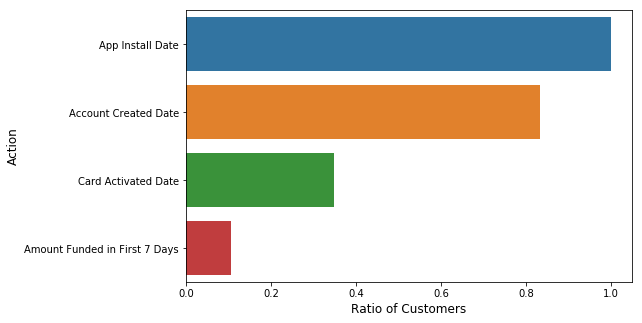

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(y='index', x='conversion_ratio', data=conversion_ratio, ax=ax)
ax.set_xlabel('Ratio of Customers', fontsize =12)
ax.set_ylabel('Action', fontsize =12)
plt.show()

We find that there is a quick decrease after customers create account and there are only 34% customers who choose to activate cards. Here are some possible reasons for the above:

1. The activating card process is very complicated;
2. The delivery period is too long;
3. The app is not easy to use.

Further, we find there are fewer customers who choose to fund money in the first 7 days. Possible reasons:

1. There is not enough attracting activation bonus; 
2. APY may still not be high enough to attract customers;
3. There might be transaction delays on certain accounts;
4. The app does not work very well.

### Calculate the conversion rate for each activation

In [21]:
# function to calculate conversion rates for installing app, creating account, activating card and funding amount in the first 7th days

def conversion_rate(df):
    
    rates = []
    tmp = df[~df['App Install Date'].isnull()]
    rates.append(1 - tmp['Account Created Date'].isnull().sum() / len(tmp))
    
    tmp = df[~df['Account Created Date'].isnull()]
    rates.append(1 - tmp['Card Activated Date'].isnull().sum() / len(tmp))
    
    tmp = df[~df['Card Activated Date'].isnull()]
    rates.append(1 - tmp['Amount Funded in First 7 Days'].isnull().sum() / len(tmp))
    
    return rates

In [22]:
rates = conversion_rate(data)
names = ['Account Created Date', 'Card Activated Date', 'Amount Funded in First 7 Days']
maps = {'Action': names, 'Conversion Rate': rates}
step_conversion = pd.DataFrame(maps, columns=['Action', 'Conversion Rate'])
step_conversion

,Action,Conversion Rate
0,Account Created Date,0.832262
1,Card Activated Date,0.419141
2,Amount Funded in First 7 Days,0.264325


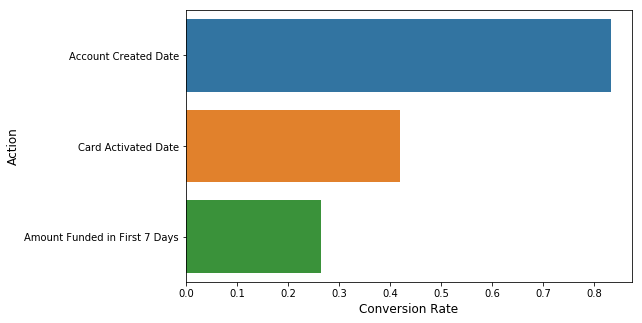

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(y='Action', x='Conversion Rate', data=step_conversion, ax=ax)
ax.set_xlabel('Conversion Rate', fontsize =12)
ax.set_ylabel('Action', fontsize =12)
plt.show()

There are 83% customers create accounts after they install the app, and the percentage is accepted;
42% customers activate the card after they create the accounts, and we lost more than 50% customers in this phase;
26% customers fund money after they activate the cards, and we lost more 70% customers which seems to be the most serious problem.

We should focus more on the last conversation process.

In [24]:
F_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Facebook Ads'])
G_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Google Adwords'])
D_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Display Ads'])
A_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Apple Search Ads'])
S_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Snapchat Ads'])
U_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Unknown'])
B_rates = conversion_rate(data[data['Marketing Acquistion Channel'] == 'Bing Ads'])

Action = ['Account Created Date', 'Card Activated Date', 'Amount Funded in First 7 Days']

In [25]:
maps = {'Action':Action, 
        'F_rates': F_rates, 
        'G_rates': G_rates,
        'D_rates': D_rates,
        'A_rates': A_rates, 
        'S_rates': S_rates,
        'U_rates': U_rates,
        'B_rates': B_rates
       }
#columns = ['Facebook Ads', 'Google Adwords', 'Display Ads', 'Apple Search Ads','Snapchat Ads', 'Unknown', 'Bing Ads']

channel = pd.DataFrame(maps)
#channel
long = pd.melt(channel, ['Action'])
long

,Action,variable,value
0,Account Created Date,F_rates,0.755609
1,Card Activated Date,F_rates,0.387931
2,Amount Funded in First 7 Days,F_rates,0.272428
3,Account Created Date,G_rates,0.909702
4,Card Activated Date,G_rates,0.447800
5,Amount Funded in First 7 Days,G_rates,0.258250
6,Account Created Date,D_rates,0.823322
7,Card Activated Date,D_rates,0.429185
8,Amount Funded in First 7 Days,D_rates,0.220000
9,Account Created Date,A_rates,0.826370


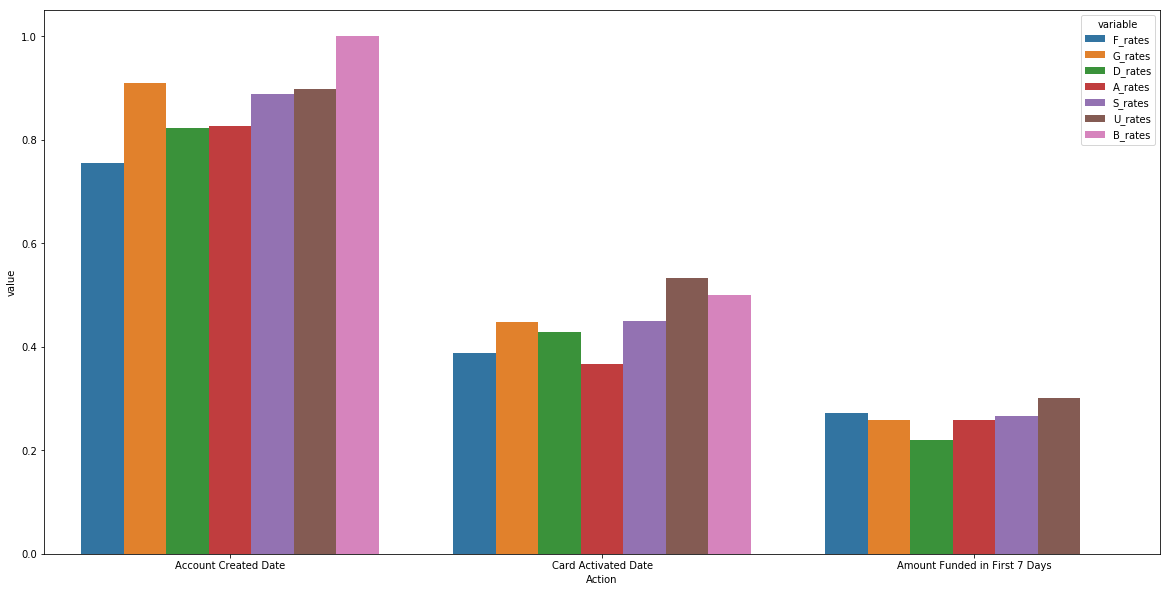

In [26]:
fig, ax = plt.subplots(figsize= (20,10))
sns.barplot(x = 'Action', y ='value', data = long, ax = ax, hue ='variable' )
plt.show()

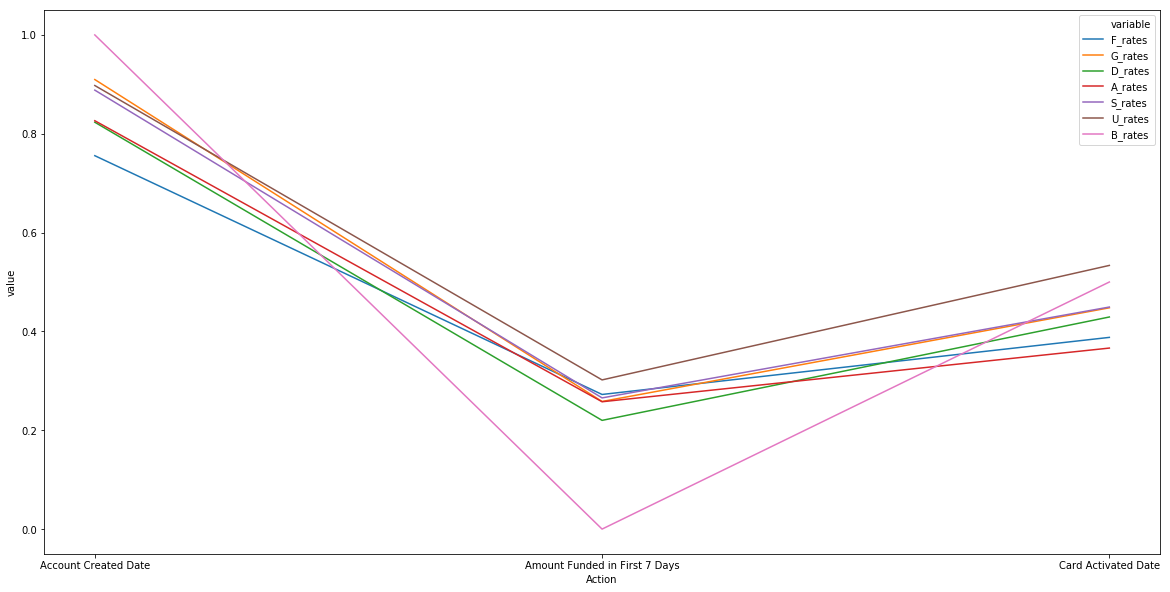

In [27]:
fig, ax = plt.subplots(figsize= (20,10))
sns.lineplot(x = 'Action', y ='value', data = long, ax = ax, hue ='variable' )
plt.show()

From the line plots, we can find that 'Bing Ads' has higher rates in 'Account Created' and 'Card Activated' but lowest rate in 'Amount Funded in First 7 Days';

Unknown has the best perfomance in 'Amount Funded in First 7 Days Action' and 'Card Activated' and the reason is possibly that these customer are referred by their friends or relatives who are more reliable than media websites;

'Facebook Ads' and 'Snapchat Ads' are social medias (most connections are friends, relatives and colleagues) and the converation rates are similar in 'Amount Funded in First 7 Days', while 'Google Adwords' and 'Apple Search Ads'are Search engines (both of them have good reputation) and the converation rates are similar in 'Amount Funded in First 7 Days'; The four platforms are very similar.

Because the unknown scource customers are hard to control and advertisting, we could supply better service to current customers and make them to refer others; 

For future ads stratergy, 'Facebook Ads', 'Snapchat Ads', 'Google Adwords' and 'Apple Search Ads', these social medias and superior search engines may be better options than things like 'Bing Ads' and 'Display Ads'.

### Focus on the fund amount

In [28]:
amount_funded = data[data['Amount Funded in First 7 Days'].notnull()]['Amount Funded in First 7 Days']

In [29]:
def convert_range(df):
    value_range = []
    for i in df: 
        if i > 0:
            value_range.append('> 0')
        else:
            value_range.append('< 0')
    return(value_range)    

In [30]:
value_range = convert_range(amount_funded)
amount_range = {'value_range':value_range, 'amount_funded':amount_funded }
amount_range = pd.DataFrame(amount_range)

amount_groupby_range = amount_range.groupby('value_range').count()
amount_groupby_range

,amount_funded
value_range,
< 0,130
> 0,931


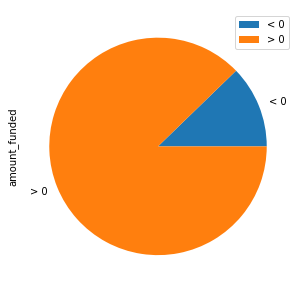

In [31]:
from matplotlib.pyplot import pie, axis, show

amount_groupby_range.plot(kind='pie', subplots=True, figsize=(5, 5))
plt.show()

In [32]:
print('There are', round(amount_range[amount_range['value_range'] == '< 0']['amount_funded'].count() / len(amount_range)*100,2), '%', 'customers\' accounts with fund < 0')
print('There are', round(amount_range[amount_range['value_range']== '> 0']['amount_funded'].count() / len(amount_range)*100,2), '%',  'customers\' accounts with fund > 0')

print('Most of our customers are more interested in the high-yeild saving account (APY), \n'
      'while a small proportion of them may be the low income families who are more interested in \"No Fee Overdraft\".') 

There are 12.25 % customers' accounts with fund < 0
There are 87.75 % customers' accounts with fund > 0
Most of our customers are more interested in the high-yeild saving account (APY), 
while a small proportion of them may be the low income families who are more interested in "No Fee Overdraft".


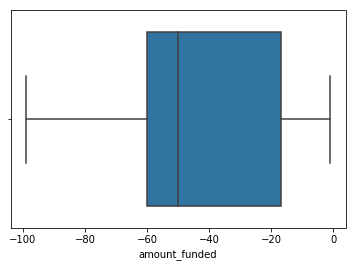

In [33]:
negative_amount = amount_range[amount_range['value_range'] == '< 0']
sns.boxplot(negative_amount['amount_funded'])
plt.show()

In [34]:
amount_range[amount_range['value_range'] == '> 0'].describe()

,amount_funded
count,9.310000e+02
mean,1.086983e+05
std,3.277327e+06
min,1.000000e+00
25%,5.000000e+01
50%,3.270000e+02
75%,1.319500e+03
max,1.000000e+08


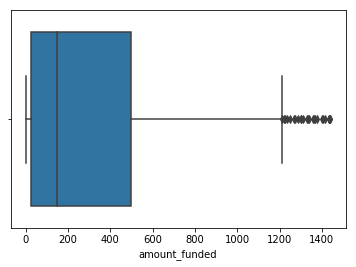

In [35]:
# Since more than 75% funding amount is less than 1300, we temporarily ignore higher amounts to see the trend
positive_amount = amount_range[(amount_range['value_range'] == '> 0') & (amount_range['amount_funded'] < 1500)]
sns.boxplot(positive_amount['amount_funded'])
plt.show()

### Focus on the source


In [36]:
data.head()

,Customer ID,Marketing Acquistion Channel,App Install Date,Account Created Date,Card Activated Date,Amount Funded in First 7 Days
0,999822,Facebook Ads,2017-06-20,2017-06-22,2017-07-05,NaN
1,999558,Google Adwords,2017-06-03,2017-06-03,2017-06-15,NaN
2,999536,Display Ads,2017-06-05,2017-06-05,NaT,NaN
3,999436,Facebook Ads,2017-06-04,2017-06-04,NaT,NaN
4,999333,Google Adwords,2017-05-01,2017-05-01,NaT,NaN


In [37]:
channel_group = data.groupby('Marketing Acquistion Channel').count().reset_index()
channel_group.head()

,Marketing Acquistion Channel,Customer ID,App Install Date,Account Created Date,Card Activated Date,Amount Funded in First 7 Days
0,Apple Search Ads,1077,1077,890,326,98
1,Bing Ads,8,8,8,4,0
2,Display Ads,283,283,233,100,28
3,Facebook Ads,4145,4145,3132,1215,402
4,Google Adwords,3422,3422,3113,1394,403


In [38]:
long = pd.melt(channel_group, id_vars = ['Marketing Acquistion Channel'])
long.head()

,Marketing Acquistion Channel,variable,value
0,Apple Search Ads,Customer ID,1077
1,Bing Ads,Customer ID,8
2,Display Ads,Customer ID,283
3,Facebook Ads,Customer ID,4145
4,Google Adwords,Customer ID,3422


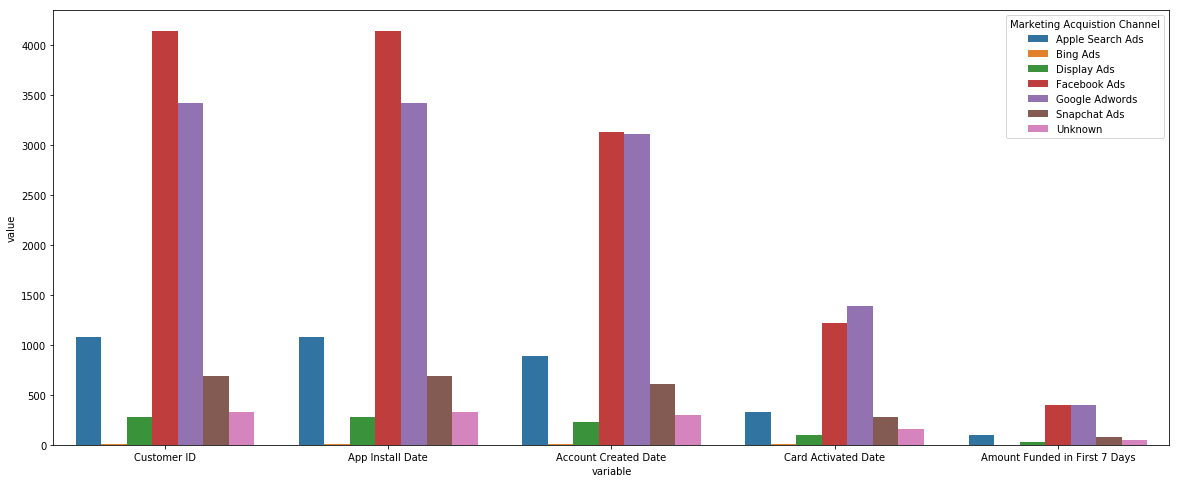

In [39]:
fig, ax= plt.subplots(figsize= (20, 8))
sns.barplot(data = long, hue = 'Marketing Acquistion Channel', x = 'variable', y = 'value')
plt.show()

Facebook, Google and Apple contribute the most of the customers.

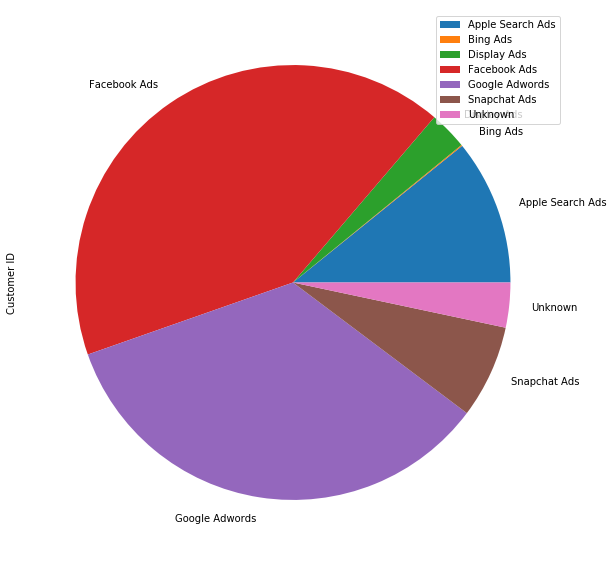

In [40]:
df_Customer_ID = channel_group[['Marketing Acquistion Channel', 'Customer ID']].set_index('Marketing Acquistion Channel')
df_Customer_ID.plot.pie(subplots=True, figsize=(20, 10))
plt.show()

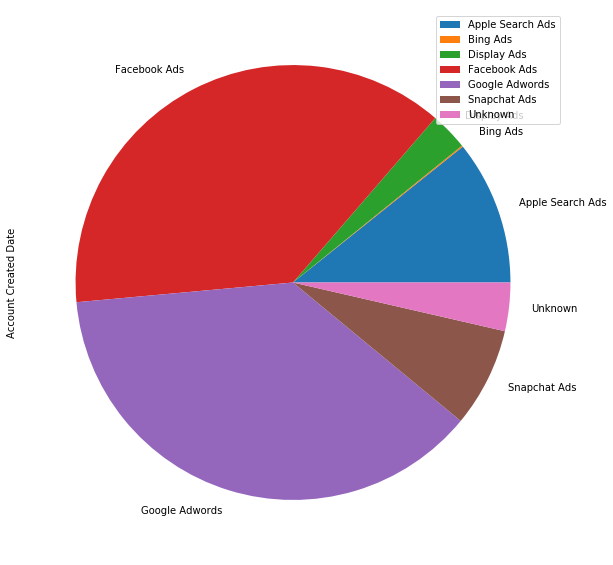

In [41]:
df_Account = channel_group[['Marketing Acquistion Channel', 'Account Created Date']].set_index('Marketing Acquistion Channel')
df_Account.plot.pie(subplots=True, figsize=(20, 10))
plt.show()

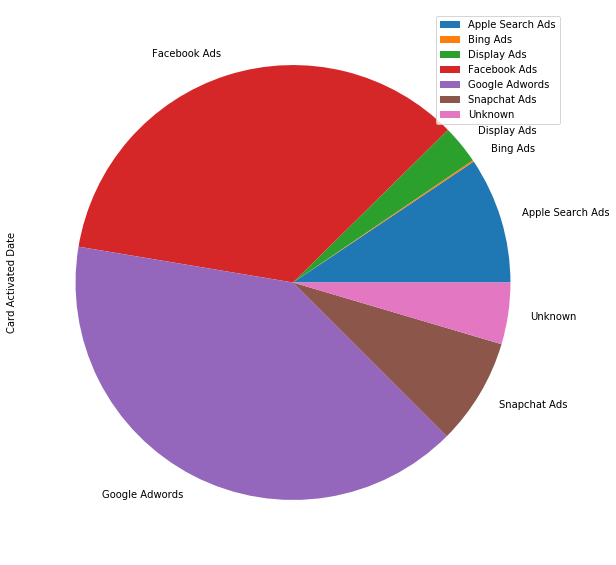

In [42]:
df_Card_Activated = channel_group[['Marketing Acquistion Channel', 'Card Activated Date']].set_index('Marketing Acquistion Channel')
df_Card_Activated.plot.pie(subplots=True, figsize=(20, 10))
plt.show()

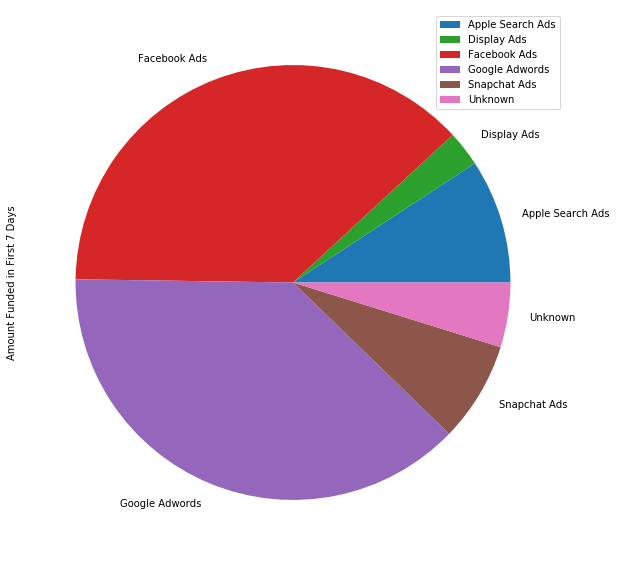

In [43]:
df_Amount_Funded = channel_group[['Marketing Acquistion Channel', 'Amount Funded in First 7 Days']].set_index('Marketing Acquistion Channel')
df_Amount_Funded.plot.pie(subplots=True, figsize=(20, 10))
plt.show()

We find that the percentage of 'Facebook Ads' and 'Google Adwords' is more than 60% the following high propotion platforms are 
'Apple Search Ads' and 'Snapchat Ads' and the four platform are the more important channels which is conresponding to the conclusion of step by step funnely ananlysis group by platform.  